### Problème 3 : Reconstruction de chiffres manuscrits et détection des anomalies (Indication : utilisation h2o avec R-studio) :

```
# Fait par : ELMAHFOUD RADOUANE
# Encadré par : HOAYEK ANIS
```


1.

In [1]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=aac170a3e58974497f4a54c482e229041d1dc8a10888859c0d46ab44133b51c1
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


On utilise la bibliothèque h2o pour traiter le jeu de données MNIST Ce jeu de données contient des descriptions de chiffres manuscrits au format 28x28 pixels (784 pixels). Le script initialise une session h2o, télécharge le jeu de données MNIST, affiche les premières lignes des données et visualise un exemple de chiffre manuscrit à l'aide de la bibliothèque matplotlib. Le code met en œuvre des étapes essentielles, telles que l'initialisation de la session h2o, l'importation du jeu de données, et offre une représentation visuelle pour une meilleure compréhension.

In [ ]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

# Initialiser la session h2o
h2o.init(max_mem_size="5G")

# Téléchargement et chargement de la base de données MNIST
mnist_path = "http://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz"
mnist_data = h2o.import_file(mnist_path)

# Afficher les premières lignes des données
mnist_df = h2o.as_list(mnist_data)
print(mnist_df.head())

# Visualiser un exemple de chiffre manuscrit
first_image = mnist_df.iloc[0, 1:].values.reshape(28, 28)
plt.imshow(first_image, cmap='gray')
plt.show()

Le tableau affiché représente les premières lignes du jeu de données avec 785 colonnes, où les 784 premières colonnes représentent les pixels de l'image, et la dernière colonne (C785) représente l'étiquette du chiffre (dans cet exemple, le chiffre 2).

2.

On prépare les données MNIST pour une utilisation avec le framework h2o. Après l'initialisation de la session h2o, les données d'entraînement et de test sont téléchargées à partir de Keras. Ensuite, ces données sont converties en DataFrames h2o en transformant les matrices 28x28 d'images en vecteurs de 784 pixels. Les colonnes des DataFrames sont nommées de manière explicite, allant de "pixel1" à "pixel784". Les premières lignes des DataFrames sont ensuite affichées pour vérifier la réussite de la conversion. Les DataFrames résultants, `train_h2o` et `test_h2o`, représentent désormais les données MNIST sous une forme compatible avec h2o, prêtes à être utilisées dans des tâches d'apprentissage automatique.

In [ ]:
from tensorflow.keras.datasets import mnist

# Initialiser la session h2o
h2o.init(max_mem_size="5G")

# Télécharger les données MNIST à l'aide de Keras
(train_images, _), (test_images, _) = mnist.load_data()

# Convertir les données en DataFrame h2o
# Les données MNIST sont converties de matrices 28x28 en vecteurs de longueur 784
train_h2o = h2o.H2OFrame(train_images.reshape(train_images.shape[0], -1))
test_h2o = h2o.H2OFrame(test_images.reshape(test_images.shape[0], -1))

# Afficher les premières lignes des données d'entraînement et de test
print(train_h2o.head())
print(test_h2o.head())

3.

On va créer et entraîner un auto-encodeur. L'auto-encodeur est configuré avec une couche cachée de 2 neurones, une fonction d'activation tangente hyperbolique, une représentation sparse, et il est entraîné sur 50 époques. Les codages (représentations compressées) des données d'entraînement sont ensuite extraits et affichés.

In [12]:
from h2o.estimators import H2ODeepLearningEstimator

# Initialisation de la session h2o
h2o.init(max_mem_size="5G")

# Configuration et entraînement de l'auto-encodeur
ae = H2ODeepLearningEstimator(
    model_id="autoencoder",
    autoencoder=True,
    hidden=[2],
    activation="Tanh",
    sparse=True,
    epochs=50
)

ae.train(x=list(range(train_h2o.shape[1])), training_frame=train_h2o)

# Utiliser 'predict' pour obtenir les codings de l'auto-encodeur
ae_codings = ae.predict(train_h2o)

# Afficher les codages extraits
ae_codings.head()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,21 mins 15 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_d5z5a4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.820 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


deeplearning Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [C86, C85, C729, C728, C646, C645, C169, C760, C561, C53, C11, C55, C10, C54, C57, C12, C56, C58, C17, C19, C18, C731, C730, C20, C22, C21, C24, C23, C26, C25, C28, C27, C702, C701, C29, C700, C1, C2, C784, C3, C783, C4, C782, C5, C781, C6, C142, C7, C141, C8, C9, C31, C30, C32, C759, C758, C757, C756, C755, C477, C113, C674, C112, C673, C672, C84, C83]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


reconstr_C13,reconstr_C14,reconstr_C15,reconstr_C16,reconstr_C33,reconstr_C34,reconstr_C35,reconstr_C36,reconstr_C37,reconstr_C38,reconstr_C39,reconstr_C40,reconstr_C41,reconstr_C42,reconstr_C43,reconstr_C44,reconstr_C45,reconstr_C46,reconstr_C47,reconstr_C48,reconstr_C49,reconstr_C50,reconstr_C51,reconstr_C52,reconstr_C59,reconstr_C60,reconstr_C61,reconstr_C62,reconstr_C63,reconstr_C64,reconstr_C65,reconstr_C66,reconstr_C67,reconstr_C68,reconstr_C69,reconstr_C70,reconstr_C71,reconstr_C72,reconstr_C73,reconstr_C74,reconstr_C75,reconstr_C76,reconstr_C77,reconstr_C78,reconstr_C79,reconstr_C80,reconstr_C81,reconstr_C82,reconstr_C87,reconstr_C88,reconstr_C89,reconstr_C90,reconstr_C91,reconstr_C92,reconstr_C93,reconstr_C94,reconstr_C95,reconstr_C96,reconstr_C97,reconstr_C98,reconstr_C99,reconstr_C100,reconstr_C101,reconstr_C102,reconstr_C103,reconstr_C104,reconstr_C105,reconstr_C106,reconstr_C107,reconstr_C108,reconstr_C109,reconstr_C110,reconstr_C111,reconstr_C114,reconstr_C115,reconstr_C116,reconstr_C117,reconstr_C118,reconstr_C119,reconstr_C120,reconstr_C121,reconstr_C122,reconstr_C123,reconstr_C124,reconstr_C125,reconstr_C126,reconstr_C127,reconstr_C128,reconstr_C129,reconstr_C130,reconstr_C131,reconstr_C132,reconstr_C133,reconstr_C134,reconstr_C135,reconstr_C136,reconstr_C137,reconstr_C138,reconstr_C139,reconstr_C140,reconstr_C143,reconstr_C144,reconstr_C145,reconstr_C146,reconstr_C147,reconstr_C148,reconstr_C149,reconstr_C150,reconstr_C151,reconstr_C152,reconstr_C153,reconstr_C154,reconstr_C155,reconstr_C156,reconstr_C157,reconstr_C158,reconstr_C159,reconstr_C160,reconstr_C161,reconstr_C162,reconstr_C163,reconstr_C164,reconstr_C165,reconstr_C166,reconstr_C167,reconstr_C168,reconstr_C170,reconstr_C171,reconstr_C172,reconstr_C173,reconstr_C174,reconstr_C175,reconstr_C176,reconstr_C177,reconstr_C178,reconstr_C179,reconstr_C180,reconstr_C181,reconstr_C182,reconstr_C183,reconstr_C184,reconstr_C185,reconstr_C186,reconstr_C187,reconstr_C188,reconstr_C189,reconstr_C190,reconstr_C191,reconstr_C192,reconstr_C193,reconstr_C194,reconstr_C195,reconstr_C196,reconstr_C197,reconstr_C198,reconstr_C199,reconstr_C200,reconstr_C201,reconstr_C202,reconstr_C203,reconstr_C204,reconstr_C205,reconstr_C206,reconstr_C207,reconstr_C208,reconstr_C209,reconstr_C210,reconstr_C211,reconstr_C212,reconstr_C213,reconstr_C214,reconstr_C215,reconstr_C216,reconstr_C217,reconstr_C218,reconstr_C219,reconstr_C220,reconstr_C221,reconstr_C222,reconstr_C223,reconstr_C224,reconstr_C225,reconstr_C226,reconstr_C227,reconstr_C228,reconstr_C229,reconstr_C230,reconstr_C231,reconstr_C232,reconstr_C233,reconstr_C234,reconstr_C235,reconstr_C236,reconstr_C237,reconstr_C238,reconstr_C239,reconstr_C240,reconstr_C241,reconstr_C242,reconstr_C243
-0.292656,9.8144,-8.2866,-0.0697726,0.237865,-1.30859,4.99884,2.3269,-0.702654,4.96429,1.82163,7.94817,0.931754,4.3739,3.98338,1.63319,-1.11279,-0.198945,5.62825,7.72211,0.83816,6.74259,-7.08955,-4.7886,-2.69293,0.356636,-6.01674,-1.11322,-7.52007,-5.05711,7.20194,1.69096,2.00565,-7.81595,0.685276,0.095202,9.97116,11.2742,0.146673,1.2159,12.4033,-3.29267,-6.95207,-4.34243,-9.09115,2.72901,12.733,-1.09685,-3.88431,4.34678,1.88398,-1.3044,-1.4166,4.89069,-5.94111,10.1287,12.0237,9.48426,2.2922,16.0142,12.9597,17.9097,10.7606,9.31165,8.38673,11.2948,8.79873,-1.88362,11.7994,-4.68951,2.46509,5.79276,-3.43779,-0.882158,2.2395,-1.80123,6.85585,5.24086,-3.23452,3.65712,5.89479,12.7589,20.0281,20.9952,25.3516,32.7688,51.0643,46.3222,44.0396,29.5665,27.3776,26.4953,13.0032,7.6604,-0.814965,-5.98534,2.81876,0.914292,-1.41763,0.927946,-1.32575,8.18961,4.32031,2.46461,2.88906,10.3004,16.6022,17.6523,29.6505,46.4826,65.8592,82.4458,81.6846,88.0509,94.2091,75.8331,70.9995,58.3865,41.5009,26.4224,24.151,11.373,-1.49799,-10.0585,3.72503,-1.00134,-0.217943,7.55054,6.81512,9.33043,15.7626,0.146182,11.6217,30.8843,36.5595,49.2226,73.696,98.6314,100.082,115.608,119.099,113.279,104.294,97.5394,64.4549,46.8226,29.4155,12.944,20.8654,6.15418,-7.03831,4.91041,-0.55

- Interprétation de la sortie du modèle Deep Learning RuntimeWarning: Dropping bad and constant columns: [C86, C85, C729,...,C83].

Lors de la construction du modèle Deep Learning, un avertissement a été émis indiquant que certaines colonnes du jeu de données étaient constantes ou considérées comme ayant des problèmes. Ces colonnes, identifiées dans l'avertissement , ont été exclues de l'apprentissage. Cette pratique est courante dans le prétraitement des données pour garantir que le modèle n'apprend que des caractéristiques utiles et significatives, améliorant ainsi l'efficacité et les performances du modèle.

Cette décision a été prise pour éliminer le bruit et améliorer la qualité du modèle en se concentrant uniquement sur les caractéristiques informatives. Ainsi, le modèle a pris une décision proactive pour garantir que seules les variables pertinentes contribuent à l'apprentissage.


4.

In [14]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ODeepLearningEstimator

# Initialiser la session h2o
h2o.init(max_mem_size="5G")

# Définir la grille de recherche pour les architectures des AE
hyper_params = {
    'hidden': [
        [50],
        [100],
        [300, 100, 300]
    ]
}

# Configuration du modèle de base pour l'auto-encodeur
ae_base = H2ODeepLearningEstimator(
    autoencoder=True,
    activation="Tanh",
    sparse=True,
    ignore_const_cols=False,
    seed=123
)

# Création et lancement de la recherche sur grille
grid = H2OGridSearch(
    model=ae_base,
    hyper_params=hyper_params,
    search_criteria={"strategy": "Cartesian"}
)
grid.train(x=list(range(train_h2o.shape[1])), training_frame=train_h2o)

# Récupérer et trier les résultats de la grille
sorted_grid = grid.get_grid(sort_by='mse', decreasing=False)
print(sorted_grid)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 5 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_d5z5a4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.402 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by increasing mse
    hidden           model_ids                                                                                                      mse
--  ---------------  -------------------------------------------------------------------------------------------------------------  ---------
    100              Grid_DeepLearning_Key_Frame__upload_bf45c47010112db5681fb3b27e47478a.hex_model_python_1706040977426_2_model_2  0.0118507
    50               Grid_DeepLearning_Key_Frame__upload_bf45c47010112db5681fb3b27e47478a.hex_model_python_1706040977426_2_model_1  0.0170295
    [300, 100, 300]  Grid_DeepLearning_Key_Frame__upload_bf45c47010112db5681fb3b27e47478a.hex_model_python_1706040977426_2_model_3  0.0180207


AE avec 100 neurones dans la couche intermédiaire a la meilleure performance avec un MSE de 0.0118507. Cela signifie que cet auto-encodeur a réussi à reconstruire les images de test avec une erreur moyenne quadratique relativement faible.

AE avec 50 neurones dans la couche intermédiaire arrive en deuxième position avec un MSE légèrement supérieur de 0.0170295. Il reconstruit également les images avec une erreur raisonnable, mais légèrement plus élevée que le modèle précédent.

AE avec 300, 100, 300 neurones dans les couches intermédiaires a le MSE le plus élevé parmi les trois, avec une valeur de 0.0180207. Cela indique une performance légèrement moins bonne dans la reconstruction des images par rapport aux deux modèles précédents.

En termes d'interprétation, un MSE plus bas indique une meilleure capacité de reconstruction des images, c'est-à-dire que l'auto-encodeur est capable de capturer efficacement les caractéristiques des données d'entrée et de les reproduire avec précision.

Dans ce cas, le modèle AE avec 100 neurones dans la couche intermédiaire semble être le meilleur en termes de MSE.

5.

On sélectionne de manière aléatoire quatre images à partir de l'ensemble de test du jeu de données MNIST, qui est un ensemble de chiffres manuscrits. Les images sélectionnées sont ensuite aplaties pour transformer chaque matrice 28x28 de pixels en un vecteur de 784 valeurs, représentant chaque pixel de l'image. Ensuite, ces vecteurs sont regroupés dans pa un DataFramendas, et les colonnes sont renommées de manière séquentielle de 'V1' à 'V784'.

L'objectif principal de cette opération est probablement d'examiner de manière concise et lisible les valeurs de pixels de ces images spécifiques, simplifiant ainsi l'analyse des structures de chiffres manuscrits. Le DataFrame résultant peut être utilisé pour visualiser ou effectuer diverses opérations d'analyse de données.

In [19]:
import pandas as pd
import numpy as np

# Définir le nombre d'images à échantillonner
sample_size = 4

# Générer des indices aléatoires pour l'échantillon
indices = np.random.choice(test_images.shape[0], sample_size, replace=False)

# Sélectionner les images de l'échantillon
sampled_digits = test_images[indices]

# Aplatir chaque image en une seule dimension (28x28 -> 784)
sampled_digits_flat = sampled_digits.reshape(sample_size, -1)

# Convertir les images aplaties en un DataFrame pandas
sampled_digits_df = pd.DataFrame(sampled_digits_flat)

# Renommer les colonnes du DataFrame
sampled_digits_df.columns = [f'V{i}' for i in range(1, sampled_digits_df.shape[1] + 1)]

# Afficher le DataFrame avec les colonnes renommées
print(sampled_digits_df)


   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V775  V776  V777  V778  V779  \
0   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   
1   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   
2   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   
3   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   

   V780  V781  V782  V783  V784  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  

[4 rows x 784 columns]


6.

In [ ]:
# Architecture identifiée comme la meilleure (à partir de la partie 4)
best_architecture = [100]

# Initialiser un modèle autoencodeur avec l'architecture identifiée
best_model = H2ODeepLearningEstimator(
    autoencoder=True,
    activation="Tanh",
    sparse=True,
    ignore_const_cols=False,
    hidden=best_architecture,
    seed=123
)

# Entraîner le modèle avec les données d'entraînement
best_model.train(x=list(range(train_h2o.shape[1])), training_frame=train_h2o)

# Prédire les valeurs des pixels reconstruits pour l'échantillon
reconstructed_digits_h2o = best_model.predict(h2o.H2OFrame(sampled_digits_df.values))
reconstructed_digits_df = h2o.as_list(reconstructed_digits_h2o)

# Renommer les colonnes du DataFrame des images reconstruites
reconstructed_digits_df.columns = [f'V{i}' for i in range(1, reconstructed_digits_df.shape[1] + 1)]

# Fusionner les images originales avec les images reconstruites
combined_df = pd.concat([sampled_digits_df, reconstructed_digits_df], axis=1)

In [26]:
sampled_digits_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


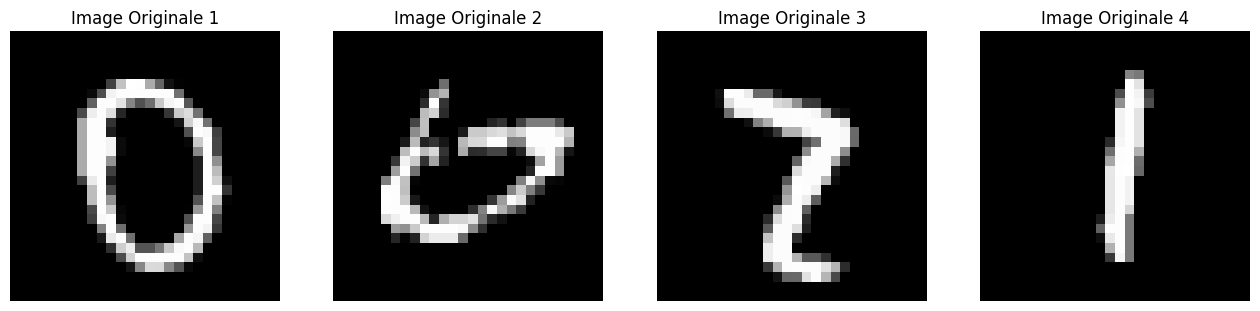

In [28]:
# Afficher les images originales vs reconstruites
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Afficher les images originales
for i in range(sample_size):
    axs[i].imshow(sampled_digits_df.values[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f'Image Originale {i+1}')
    axs[i].axis('off')

plt.show()

In [41]:
axs

array([<Axes: title={'center': 'Image Reconstruite 1'}>,
       <Axes: title={'center': 'Image Reconstruite 1'}>,
       <Axes: title={'center': 'Image Reconstruite 2'}>,
       <Axes: title={'center': 'Image Reconstruite 3'}>], dtype=object)

In [30]:
reconstructed_digits_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,-0.008937,0.013062,-0.013439,0.015109,0.017452,-0.017952,0.009497,0.012468,0.015991,-0.010104,...,5.027311,0.844013,-0.362538,-1.653749,-1.447047,-0.087674,-0.012184,-0.023502,0.018193,0.021801
1,0.007090,0.012252,0.015470,-0.019248,-0.003678,-0.005625,-0.003126,-0.004396,0.000499,0.000800,...,1.784472,-11.938983,-3.295432,-0.468612,-0.375339,-0.258189,-0.005545,-0.006534,0.010566,0.004721
2,0.010102,0.010014,0.014317,-0.012119,0.006836,-0.013013,0.008252,0.005447,0.010942,-0.009068,...,-1.089295,-6.375296,2.034184,-0.070172,-1.153625,-0.428759,-0.016676,-0.021876,0.027654,0.020639
3,-0.002210,0.019804,0.001808,0.001581,0.016781,-0.019735,0.014399,0.014593,0.019359,-0.016853,...,2.923461,-9.627403,-5.007421,0.396711,-0.335733,-0.060035,-0.005413,-0.013438,0.014573,0.012547


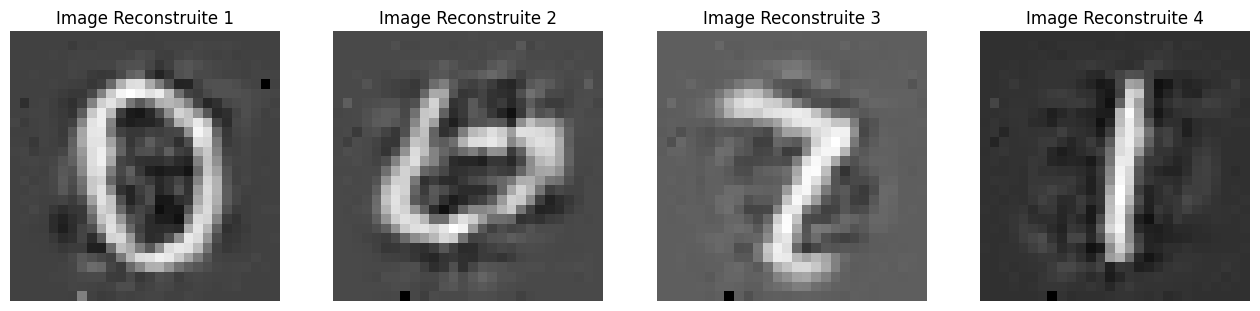

In [42]:
# Afficher les images reconstruites
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(sample_size):
    axs[i].imshow(reconstructed_digits_df.values[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f'Image Reconstruite {i+1}')
    axs[i].axis('off')

plt.show()

7.

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


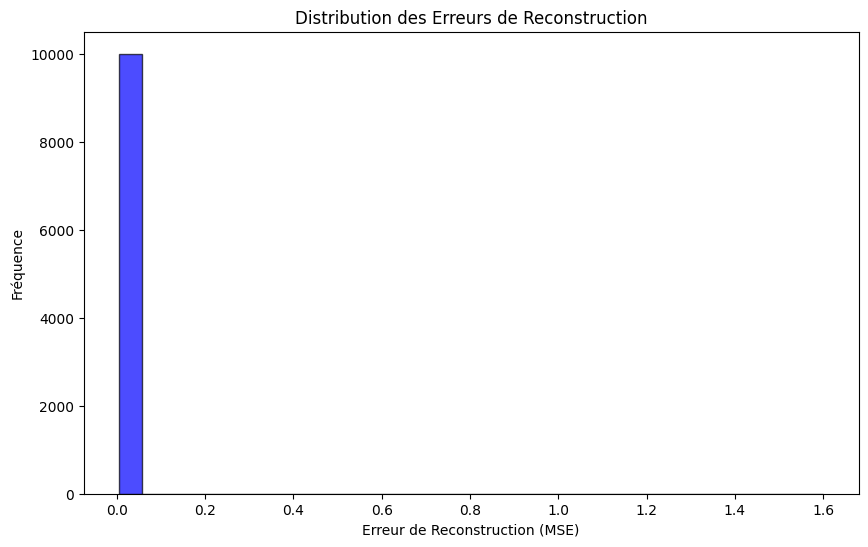

In [45]:
# Calculer les erreurs de reconstruction pour l'ensemble test
reconstruction_errors = best_model.anomaly(test_h2o)

# Convertir les erreurs de reconstruction en DataFrame pandas
reconstruction_errors_df = pd.DataFrame(reconstruction_errors.as_data_frame(), columns=["Reconstruction.MSE"])

# Visualiser la distribution des erreurs de reconstruction
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors_df["Reconstruction.MSE"], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution des Erreurs de Reconstruction")
plt.xlabel("Erreur de Reconstruction (MSE)")
plt.ylabel("Fréquence")
plt.show()

8.

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


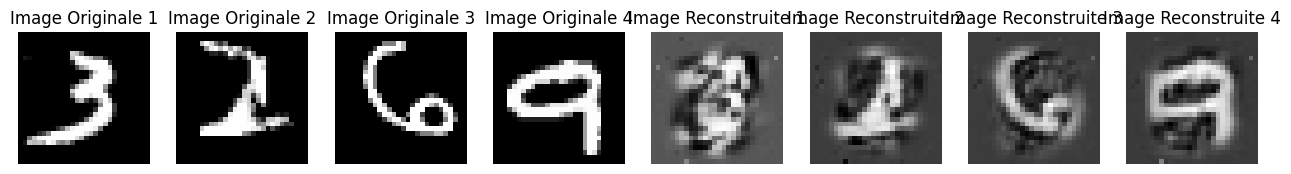

In [47]:
# Obtenir les indices des 4 erreurs de reconstruction les plus élevées
worst_indices = reconstruction_errors_df.sort_values(by='Reconstruction MSE', ascending=False).head(4).index

# Sélectionner les images correspondantes dans l'ensemble de test
worst_digits = test_images[worst_indices]

# Prédire les valeurs des pixels reconstruits pour les images sélectionnées
reconstructed_worst_digits_h2o = best_model.predict(h2o.H2OFrame(worst_digits.reshape(4, -1)))
reconstructed_worst_digits_df = h2o.as_list(reconstructed_worst_digits_h2o)

# Renommer les colonnes du DataFrame des images reconstruites
reconstructed_worst_digits_df.columns = [f'V{i}' for i in range(1, reconstructed_worst_digits_df.shape[1] + 1)]

# Afficher les images originales vs reconstruites
fig, axs = plt.subplots(1, 8, figsize=(16, 4))

# Afficher les images originales
for i in range(4):
    axs[i].imshow(worst_digits[i], cmap='gray')
    axs[i].set_title(f'Image Originale {i+1}')
    axs[i].axis('off')

# Afficher les images reconstruites
for i in range(4):
    axs[i + 4].imshow(reconstructed_worst_digits_df.values[i].reshape(28, 28), cmap='gray')
    axs[i + 4].set_title(f'Image Reconstruite {i+1}')
    axs[i + 4].axis('off')

plt.show()